In [3]:
import tensorflow as tf
import os, sys, io


#models in order to use Unet
import segmentation_models as sm

#import to augment pictures to train
import glob

import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

import random
import torchvision

Segmentation Models: using `keras` framework.


In [4]:
backbone = "resnet34"

In [5]:
SizeX = 256
SizeY = 256

In [15]:
####Augmentation####
def augment_trainingdata():
    for i in range(50):
        rotate = random.random() * 360
        for im in os.listdir("train/images1"):
            t = Image.open(f'C:/Users/kevin/coral/train/images1/' + im)
            t = t.rotate(rotate, expand = 1)
            t.save('C:/Users/kevin/coral/train/augment1/' + im[0:len(im)-4] + str(i) + '.jpeg', 'JPEG')
            
        for gn in os.listdir("train/yuh"):
            s = Image.open(f'C:/Users/kevin/coral/train/yuh/' + gn)
            s = s.rotate(rotate, expand = 1)
            s.save('C:/Users/kevin/coral/train/augment2/'  + gn[0:len(gn)-4] + str(i) + '.jpeg', 'JPEG')
            
        
    

In [4]:
augment_trainingdata()

NameError: name 'augment_trainingdata' is not defined

In [6]:
trainimages = []
trainmasks = []

convert = torchvision.transforms.ToTensor()

i = 0

for img in os.listdir("train/augment1"):
    image = Image.open("train/augment1/" + img)
    image = image.resize((SizeX, SizeY))
    trainimages.append(image)
    
    if i == 50:
        break
        
    i += 1
    
i = 0

for yuh in os.listdir("train/augment2"):
    image = Image.open("train/augment2/" + yuh)
    image = image.resize((SizeX, SizeY))
    trainmasks.append(image)
    
    if i == 50:
        break
        
    i += 1
    

    


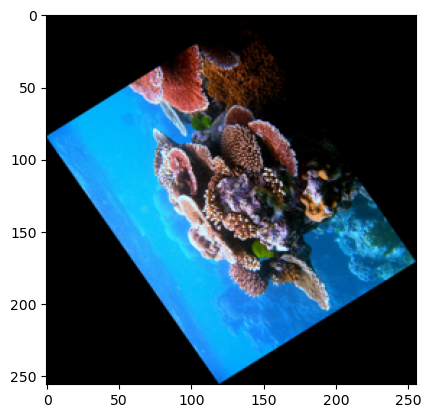

In [7]:
plt.imshow(trainimages[0])

In [8]:
trimages = np.array(trainimages)
trmasks = np.array(trainmasks)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(trimages, trmasks, test_size = 0.2, random_state = 42)

In [10]:
preprocess_input = sm.get_preprocessing(backbone)

x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

In [11]:
model = sm.Unet(backbone, encoder_weights = 'imagenet')
model.compile(optimizer = 'adam',
             loss = 'mean_squared_error',
             metrics = ['mse'])

In [12]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, None, None, 3)]      0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, None, None, 3)        9         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, None, None, 3)        0         ['bn_data[0][0]']             
 g2D)                                                                                             
                                                                                            

                                                                                                  
 zero_padding2d_6 (ZeroPadd  (None, None, None, 64)       0         ['stage1_unit3_relu1[0][0]']  
 ing2D)                                                                                           
                                                                                                  
 stage1_unit3_conv1 (Conv2D  (None, None, None, 64)       36864     ['zero_padding2d_6[0][0]']    
 )                                                                                                
                                                                                                  
 stage1_unit3_bn2 (BatchNor  (None, None, None, 64)       256       ['stage1_unit3_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage1_un

                                                                                                  
 zero_padding2d_12 (ZeroPad  (None, None, None, 128)      0         ['stage2_unit3_relu1[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 stage2_unit3_conv1 (Conv2D  (None, None, None, 128)      147456    ['zero_padding2d_12[0][0]']   
 )                                                                                                
                                                                                                  
 stage2_unit3_bn2 (BatchNor  (None, None, None, 128)      512       ['stage2_unit3_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage2_un

                                                                                                  
 zero_padding2d_18 (ZeroPad  (None, None, None, 256)      0         ['stage3_unit2_relu1[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 stage3_unit2_conv1 (Conv2D  (None, None, None, 256)      589824    ['zero_padding2d_18[0][0]']   
 )                                                                                                
                                                                                                  
 stage3_unit2_bn2 (BatchNor  (None, None, None, 256)      1024      ['stage3_unit2_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage3_un

 ding2D)                                                                                          
                                                                                                  
 stage3_unit5_conv1 (Conv2D  (None, None, None, 256)      589824    ['zero_padding2d_24[0][0]']   
 )                                                                                                
                                                                                                  
 stage3_unit5_bn2 (BatchNor  (None, None, None, 256)      1024      ['stage3_unit5_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage3_unit5_relu2 (Activa  (None, None, None, 256)      0         ['stage3_unit5_bn2[0][0]']    
 tion)                                                                                            
          

 ding2D)                                                                                          
                                                                                                  
 stage4_unit2_conv1 (Conv2D  (None, None, None, 512)      2359296   ['zero_padding2d_30[0][0]']   
 )                                                                                                
                                                                                                  
 stage4_unit2_bn2 (BatchNor  (None, None, None, 512)      2048      ['stage4_unit2_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage4_unit2_relu2 (Activa  (None, None, None, 512)      0         ['stage4_unit2_bn2[0][0]']    
 tion)                                                                                            
          

 decoder_stage1a_conv (Conv  (None, None, None, 128)      442368    ['decoder_stage1_concat[0][0]'
 2D)                                                                ]                             
                                                                                                  
 decoder_stage1a_bn (BatchN  (None, None, None, 128)      512       ['decoder_stage1a_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 decoder_stage1a_relu (Acti  (None, None, None, 128)      0         ['decoder_stage1a_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 decoder_stage1b_conv (Conv  (None, None, None, 128)      147456    ['decoder_stage1a_relu[0][0]']
 2D)      

 decoder_stage4b_bn (BatchN  (None, None, None, 16)       64        ['decoder_stage4b_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 decoder_stage4b_relu (Acti  (None, None, None, 16)       0         ['decoder_stage4b_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 final_conv (Conv2D)         (None, None, None, 1)        145       ['decoder_stage4b_relu[0][0]']
                                                                                                  
 sigmoid (Activation)        (None, None, None, 1)        0         ['final_conv[0][0]']          
                                                                                                  
Total para

In [13]:
history = model.fit(x_train,
                   y_train,
                   batch_size = 1,
                   epochs = 1,
                   verbose = 1,
                   validation_data = (x_val, y_val))



40/40 [==============================] - 45s 787ms/step - loss: 19381.6309 - mse: 19381.6309 - val_loss: 20262.1797 - val_mse: 20262.1797


In [15]:
imgg = Image.open("coralreef.jpg")
imgg = imgg.resize((256, 256))
imgg = preprocess_input(imgg)

print(type(imgg))

predictions = model.predict(imgg)

<class 'PIL.Image.Image'>


ValueError: Failed to find data adapter that can handle input: <class 'PIL.Image.Image'>, <class 'NoneType'>